# Part 1: Obtaining the data and applying basic filters

This notebook goes through the basic operations needed to obtain GAIA data from the archive and weed out obviously bad data.

## Downloading the data

The data for this practical comes from the [GAIA](https://www.cosmos.esa.int/web/gaia/) mission and must be downloaded from the online GAIA archive at [http://gea.esac.esa.int/archive/](http://gea.esac.esa.int/archive/). The tabular data is retrieved from the database via an astronomy data query language (ADQL) statement:

```
SELECT source_id, dist.r_est, dist.r_lo, dist.r_hi, dist.r_len, dist.result_flag, dist.modality_flag, src.ra, src.dec, src.L, src.B, src.parallax, src.parallax_error, cep.type_best_classification, cep.mode_best_classification, cep.pf, cep.pf_error, cep.int_average_bp, cep.int_average_bp_error, cep.int_average_g, cep.int_average_g_error, cep.int_average_rp, cep.int_average_rp_error, cep.g_absorption,cep.g_absorption_error,cep.num_clean_epochs_g
FROM external.gaiadr2_geometric_distance as dist 
JOIN gaiadr2.vari_cepheid AS cep USING (source_id) 
JOIN gaiadr2.gaia_source AS src USING (source_id)
```

This query selects multiple columns from 3 tables in the archive that are merged using a common ```source_id``` column. We will describe what each of the columns contains later in this notebook. 

On the web page, go to Search -> Advanced (ADQL) and copy the query into the box. Run the query and when finished save locally using the download icon on the right in the job window. Note that the downloaded file compressed as a 'GZIP' archive. To extract, use the command ```gunzip <filename.gz>``` on the command line.

## Inspecting the data 

The tabular data is in an XML-like format called 'VOTable', where VO stands for 'virtual observatory'. Dedicated software like [TOPCAT](http://www.star.bris.ac.uk/~mbt/topcat/) can be used to view, manipulate and plot the data. However, for our analysis we will convert the table to a [Pandas](https://pandas.pydata.org/) dataframe. Pandas is a high-performance module for doing data analysis with Python and is used widely outside of astronomy.

In [ ]:
# Start by importing necessary Python modules
from astropy.io.votable import parse
import pandas as pd
import numpy as np

In [ ]:
# Define a function to read a VOTable and return a DataFrame
def votable_to_pandas(voTabFileName, indx=0):
    """
    Reads a VOTable file and returns a Pandas dataframe.
    Reads only one sub-table, specified by the indx argument.
    """
    
    # Parse the VOTable into a table tree & convert 1st sub-table to an AstroPy table
    voTabTree = parse(voTabFileName)
    apTab = voTabTree.get_table_by_index(indx).to_table(use_names_over_ids=True)
    
    return apTab.to_pandas()

Now we run our conversion function on the VOTable to read the table into memory. The converter may issue a few warnings, but these can be safely ignored.

In [ ]:
# Call the conversion function on our downloaded VOTable
gaiaVOTabFile = "query-result.vot"
gaiaDF = votable_to_pandas(gaiaVOTabFile)

We can inspect the format of the table using the ```head()``` method of the dataframe ('methods' are functions that live inside python 'objects', like tables, and operate only on the parent object).

In [ ]:
# Print the first 10 rows of the table
gaiaDF.head(10)

Note that the leftmost column above displays the row-index of the table. This can be an integer (as above) or a text field. We can see that there are a large number of columns, so the ```head()``` method does not display them all. was We can print all the column names like this:

In [ ]:
# Print every column index and name
for i, colName in enumerate(gaiaDF.columns):
    print(i, colName)

The meanings of the column names can be found in the [GAIA data model documentation](http://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/) or viewed as hover help text on the sidebar of the GAIA query page:

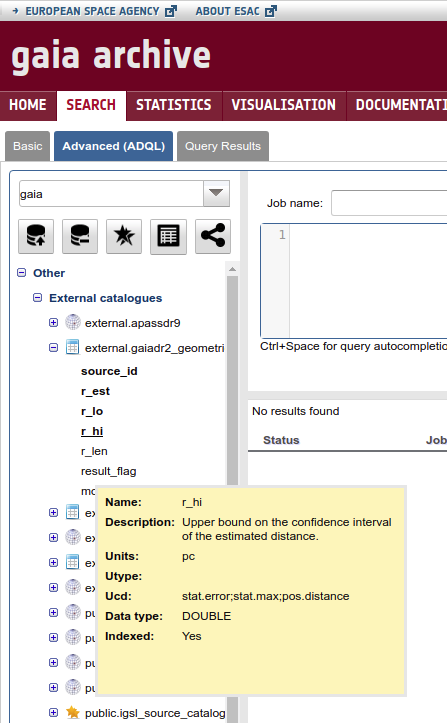